In [4]:
import numpy as np
import matplotlib.pyplot as plt

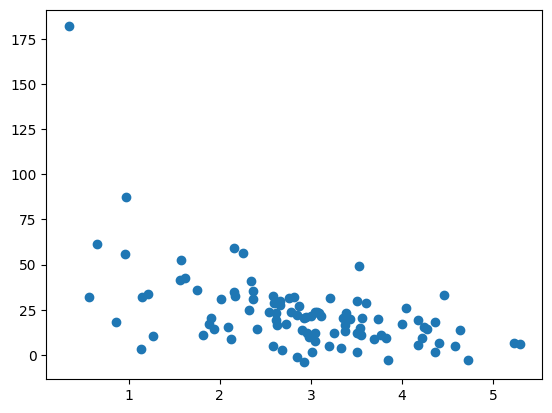

In [34]:
# Define uma semente para o gerador de números aleatórios
# Isso garante que os mesmos números sejam gerados toda vez que o código for executado (reprodutibilidade)
np.random.seed(2)

# Gera 100 valores aleatórios de velocidade de página (pageSpeeds) seguindo uma distribuição normal
# Média = 3.0 segundos, Desvio padrão = 1.0
pageSpeeds = np.random.normal(3.0, 1.0, 100)

# Gera 100 valores aleatórios para o valor de compras (purchaseAmount), também com distribuição normal
# Média = 50.0, Desvio padrão = 30.0
# Depois, divide cada valor pelo correspondente em pageSpeeds para simular que páginas mais lentas resultam em menos compras
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

# Cria um gráfico de dispersão (scatter plot) mostrando a relação entre a velocidade da página e o valor da compra
plt.scatter(pageSpeeds, purchaseAmount)

In [35]:
# Separa os 80 primeiros valores de pageSpeeds para serem usados como dados de treino (eixo X)
trainX = pageSpeeds[:80]

# Separa os 20 valores restantes de pageSpeeds para teste
testX = pageSpeeds[80:]

# Separa os 80 primeiros valores de purchaseAmount para treino (eixo Y)
trainY = purchaseAmount[:80]

# Separa os 20 valores restantes de purchaseAmount para teste
testY = purchaseAmount[80:]

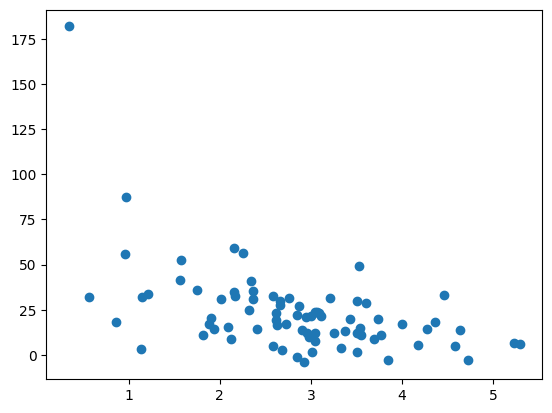

In [36]:
# Cria um gráfico de dispersão (scatter plot) com os dados de treino
# Mostra a relação entre a velocidade da página (trainX) e o valor da compra (trainY)
plt.scatter(trainX, trainY)

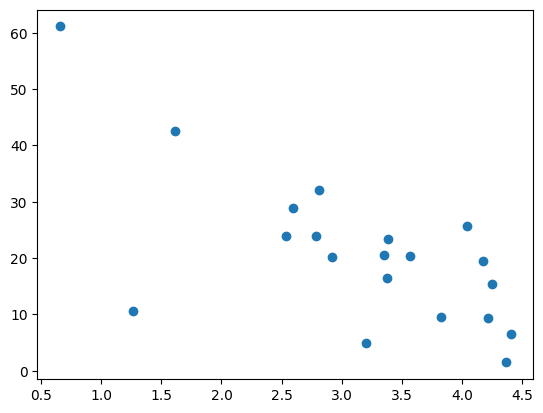

In [37]:
# Adiciona ao gráfico um scatter plot com os dados de teste
# Mostra a relação entre a velocidade da página (testX) e o valor da compra (testY)
plt.scatter(testX, testY)

In [38]:
# Converte a lista de valores de treino (trainX) em um array NumPy para facilitar operações matemáticas
x = np.array(trainX)

# Converte os valores de compra correspondentes (trainY) também em array NumPy
y = np.array(trainY)

# Ajusta um polinômio de grau 8 aos dados de treino usando regressão polinomial
# np.polyfit encontra os coeficientes do polinômio que melhor se ajusta aos pontos (x, y)
# np.poly1d cria uma função polinomial (p4) com esses coeficientes, que pode ser usada para prever novos valores
p4 = np.poly1d(np.polyfit(x, y, 8))


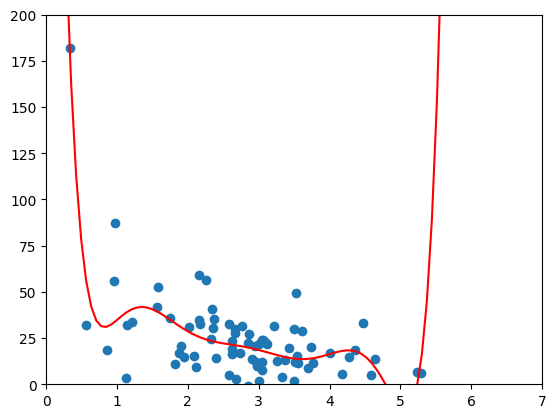

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Cria um array de 100 pontos igualmente espaçados entre 0 e 7
# Esses valores serão usados como eixo X para desenhar a curva do polinômio
xp = np.linspace(0, 7, 100)

# Cria um objeto de eixos para customizar os limites do gráfico
axes = plt.axes()

# Define o limite mínimo e máximo do eixo X (horizontal)
axes.set_xlim([0, 7])

# Define o limite mínimo e máximo do eixo Y (vertical)
axes.set_ylim([0, 200])

# Plota os pontos reais de treino no gráfico como um scatter plot
plt.scatter(x, y)

# Plota a curva do polinômio ajustado (grau 8) com os valores de xp no eixo X
# e p4(xp) no eixo Y, em vermelho
plt.plot(xp, p4(xp), c='r')

# Exibe o gráfico final
plt.show()

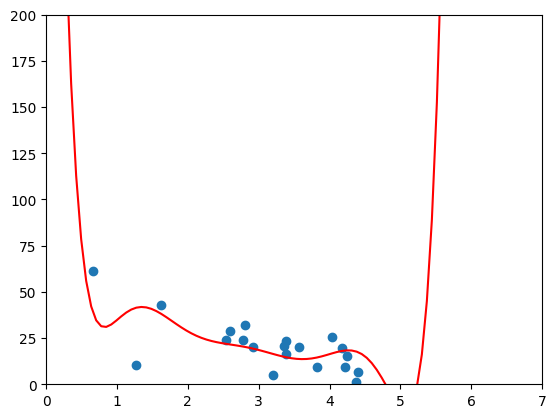

In [39]:
# Converte os dados de teste (testX) para um array NumPy
# Isso facilita a manipulação matemática e a plotagem
testX = np.array(testX)

# Converte os valores reais de saída (testY) também para array NumPy
testY = np.array(testY)

# Cria um novo objeto de eixos para configurar os limites do gráfico
axes = plt.axes()

# Define o intervalo do eixo X entre 0 e 7
axes.set_xlim([0, 7])

# Define o intervalo do eixo Y entre 0 e 200
axes.set_ylim([0, 200])

# Plota os dados de teste como um scatter plot
# Mostra os valores reais que o modelo precisa tentar prever
plt.scatter(testX, testY)

# Plota a curva do polinômio treinado anteriormente (grau 8)
# Representa a previsão feita pelo modelo sobre o domínio xp
plt.plot(xp, p4(xp), c='r')

# Exibe o gráfico com os dados de teste e a curva de previsão
plt.show()

In [40]:
# Importa a função r2_score da biblioteca scikit-learn
# Essa função é usada para calcular o coeficiente de determinação R², que mede a qualidade da previsão
from sklearn.metrics import r2_score

# Calcula o R² comparando os valores reais do teste (testY)
# com os valores previstos pelo modelo polinomial (p4(testX))
r2 = r2_score(testY, p4(testX))

# Exibe o valor do R²
print(r2)

0.30018168611498663


In [41]:
# Importa a função r2_score da biblioteca scikit-learn
# Essa função calcula o coeficiente de determinação R², que indica o quão bem o modelo se ajusta aos dados
from sklearn.metrics import r2_score

# Calcula o R² usando os dados de treino
# np.array(trainY) são os valores reais do treino
# p4(np.array(trainX)) são os valores previstos pelo modelo polinomial (grau 8) para os dados de treino
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

# Exibe o valor de R² no console
print(r2)

0.6427069514691666
